In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

2024-05-03 01:27:20.837987: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-03 01:27:20.838168: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-03 01:27:20.891539: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-03 01:27:21.011074: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-03 01:27:22.776085: W tensorflow/compiler/tf2

In [2]:
# Load the flight logs into a DataFrame
df  = pd.read_csv('/home/anujtiwari/projects/drones/FlightLogs/FLY034.csv', low_memory=False)


In [3]:
# selected_features = []

In [4]:
# for el in df.columns:
#     if 'velE' in el:
#         selected_features.append(el)

In [5]:
# selected_features

In [6]:
# IMU_ATTI(0):accelX
# IMU_ATTI(0):accelY
# IMU_ATTI(0):accelZ
selected_features = ['IMU_ATTI(0):Longitude', 'IMU_ATTI(0):Latitude', 'IMU_ATTI(0):velN', 'IMU_ATTI(0):velE']


# add more features
selected_features += ['IMU_ATTI(0):accelX', 'IMU_ATTI(0):accelY', 'IMU_ATTI(0):accelZ']


df = df[selected_features]



In [7]:
# find how many duplicate values are there
df.duplicated().sum()

# remove all the duplicate values
df = df.drop_duplicates()



# remove all the missing values
df = df.dropna()

In [8]:
df.shape

(0, 7)

In [9]:
# find how many missing values are there
df.isnull().sum()

IMU_ATTI(0):Longitude    0.0
IMU_ATTI(0):Latitude     0.0
IMU_ATTI(0):velN         0.0
IMU_ATTI(0):velE         0.0
IMU_ATTI(0):accelX       0.0
IMU_ATTI(0):accelY       0.0
IMU_ATTI(0):accelZ       0.0
dtype: float64

In [10]:
# remove alternate rows
df = df[::2]
df = df[::2]
df = df[::2]
df = df[::2]
df = df[::2]
df = df[::2]

In [11]:
df.shape

(0, 7)

In [12]:
real_last_100 = df.iloc[-100:]

# remove the last 1000 values
df = df.iloc[:-100]

In [13]:
# Normalize the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)

ValueError: Found array with 0 sample(s) (shape=(0, 7)) while a minimum of 1 is required by MinMaxScaler.

In [ ]:
# Function to create sequences for LSTM
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:(i + seq_length)])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

# Define sequence length
sequence_length = 10

In [ ]:
# Create sequences
X, y = create_sequences(scaled_data, sequence_length)

In [ ]:
# Split data into train and test sets
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [ ]:
# Define and train LSTM model
model = Sequential()

# add more layers to the model
model.add(LSTM(units=50, activation='relu', return_sequences=True))
model.add(LSTM(units=50, activation='relu'))
model.add(Dense(units=4))


In [ ]:
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=2)

Epoch 1/100


6/6 - 2s - 401ms/step - accuracy: 0.0298 - loss: 0.4440
Epoch 2/100
6/6 - 0s - 9ms/step - accuracy: 0.5119 - loss: 0.3761
Epoch 3/100
6/6 - 0s - 15ms/step - accuracy: 0.8452 - loss: 0.2877
Epoch 4/100
6/6 - 0s - 7ms/step - accuracy: 0.8452 - loss: 0.1229
Epoch 5/100
6/6 - 0s - 8ms/step - accuracy: 0.8452 - loss: 0.0545
Epoch 6/100
6/6 - 0s - 7ms/step - accuracy: 0.6488 - loss: 0.0368
Epoch 7/100
6/6 - 0s - 10ms/step - accuracy: 0.8631 - loss: 0.0348
Epoch 8/100
6/6 - 0s - 11ms/step - accuracy: 0.8452 - loss: 0.0269
Epoch 9/100
6/6 - 0s - 9ms/step - accuracy: 0.8452 - loss: 0.0246
Epoch 10/100
6/6 - 0s - 9ms/step - accuracy: 0.8452 - loss: 0.0220
Epoch 11/100
6/6 - 0s - 9ms/step - accuracy: 0.8750 - loss: 0.0190
Epoch 12/100
6/6 - 0s - 7ms/step - accuracy: 0.9583 - loss: 0.0164
Epoch 13/100
6/6 - 0s - 8ms/step - accuracy: 0.9524 - loss: 0.0152
Epoch 14/100
6/6 - 0s - 8ms/step - accuracy: 0.9524 - loss: 0.0118
Epoch 15/100
6/6 - 0s - 7ms/step - accuracy: 0.9643 - loss: 0.0108
Epoch 16/10

In [ ]:
# Predict next 100 coordinates
predicted_coordinates = []
current_sequence = X_test[-1]
for _ in range(100):
    prediction = model.predict(current_sequence.reshape(1, sequence_length, 4))
    predicted_coordinates.append(prediction)
    current_sequence = np.append(current_sequence[1:], prediction, axis=0)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━

In [ ]:
# Inverse transform the predicted coordinates
predicted_coordinates = scaler.inverse_transform(np.array(predicted_coordinates).reshape(-1, 4))


In [ ]:
# Add predicted coordinates to actual data frame
predicted_df = pd.DataFrame(predicted_coordinates, columns=selected_features)
# data = pd.concat([df, predicted_df], ignore_index=True)


In [ ]:
df.shape

(220, 4)

In [ ]:
model.summary()

Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_23 (LSTM)                  │ (None, 10, 50)         │        11,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_24 (LSTM)                  │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 4)              │           204 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 94,214 (368.03 KB)

 Trainable params: 31,404 (122.67 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 62,810 (245.36 KB)

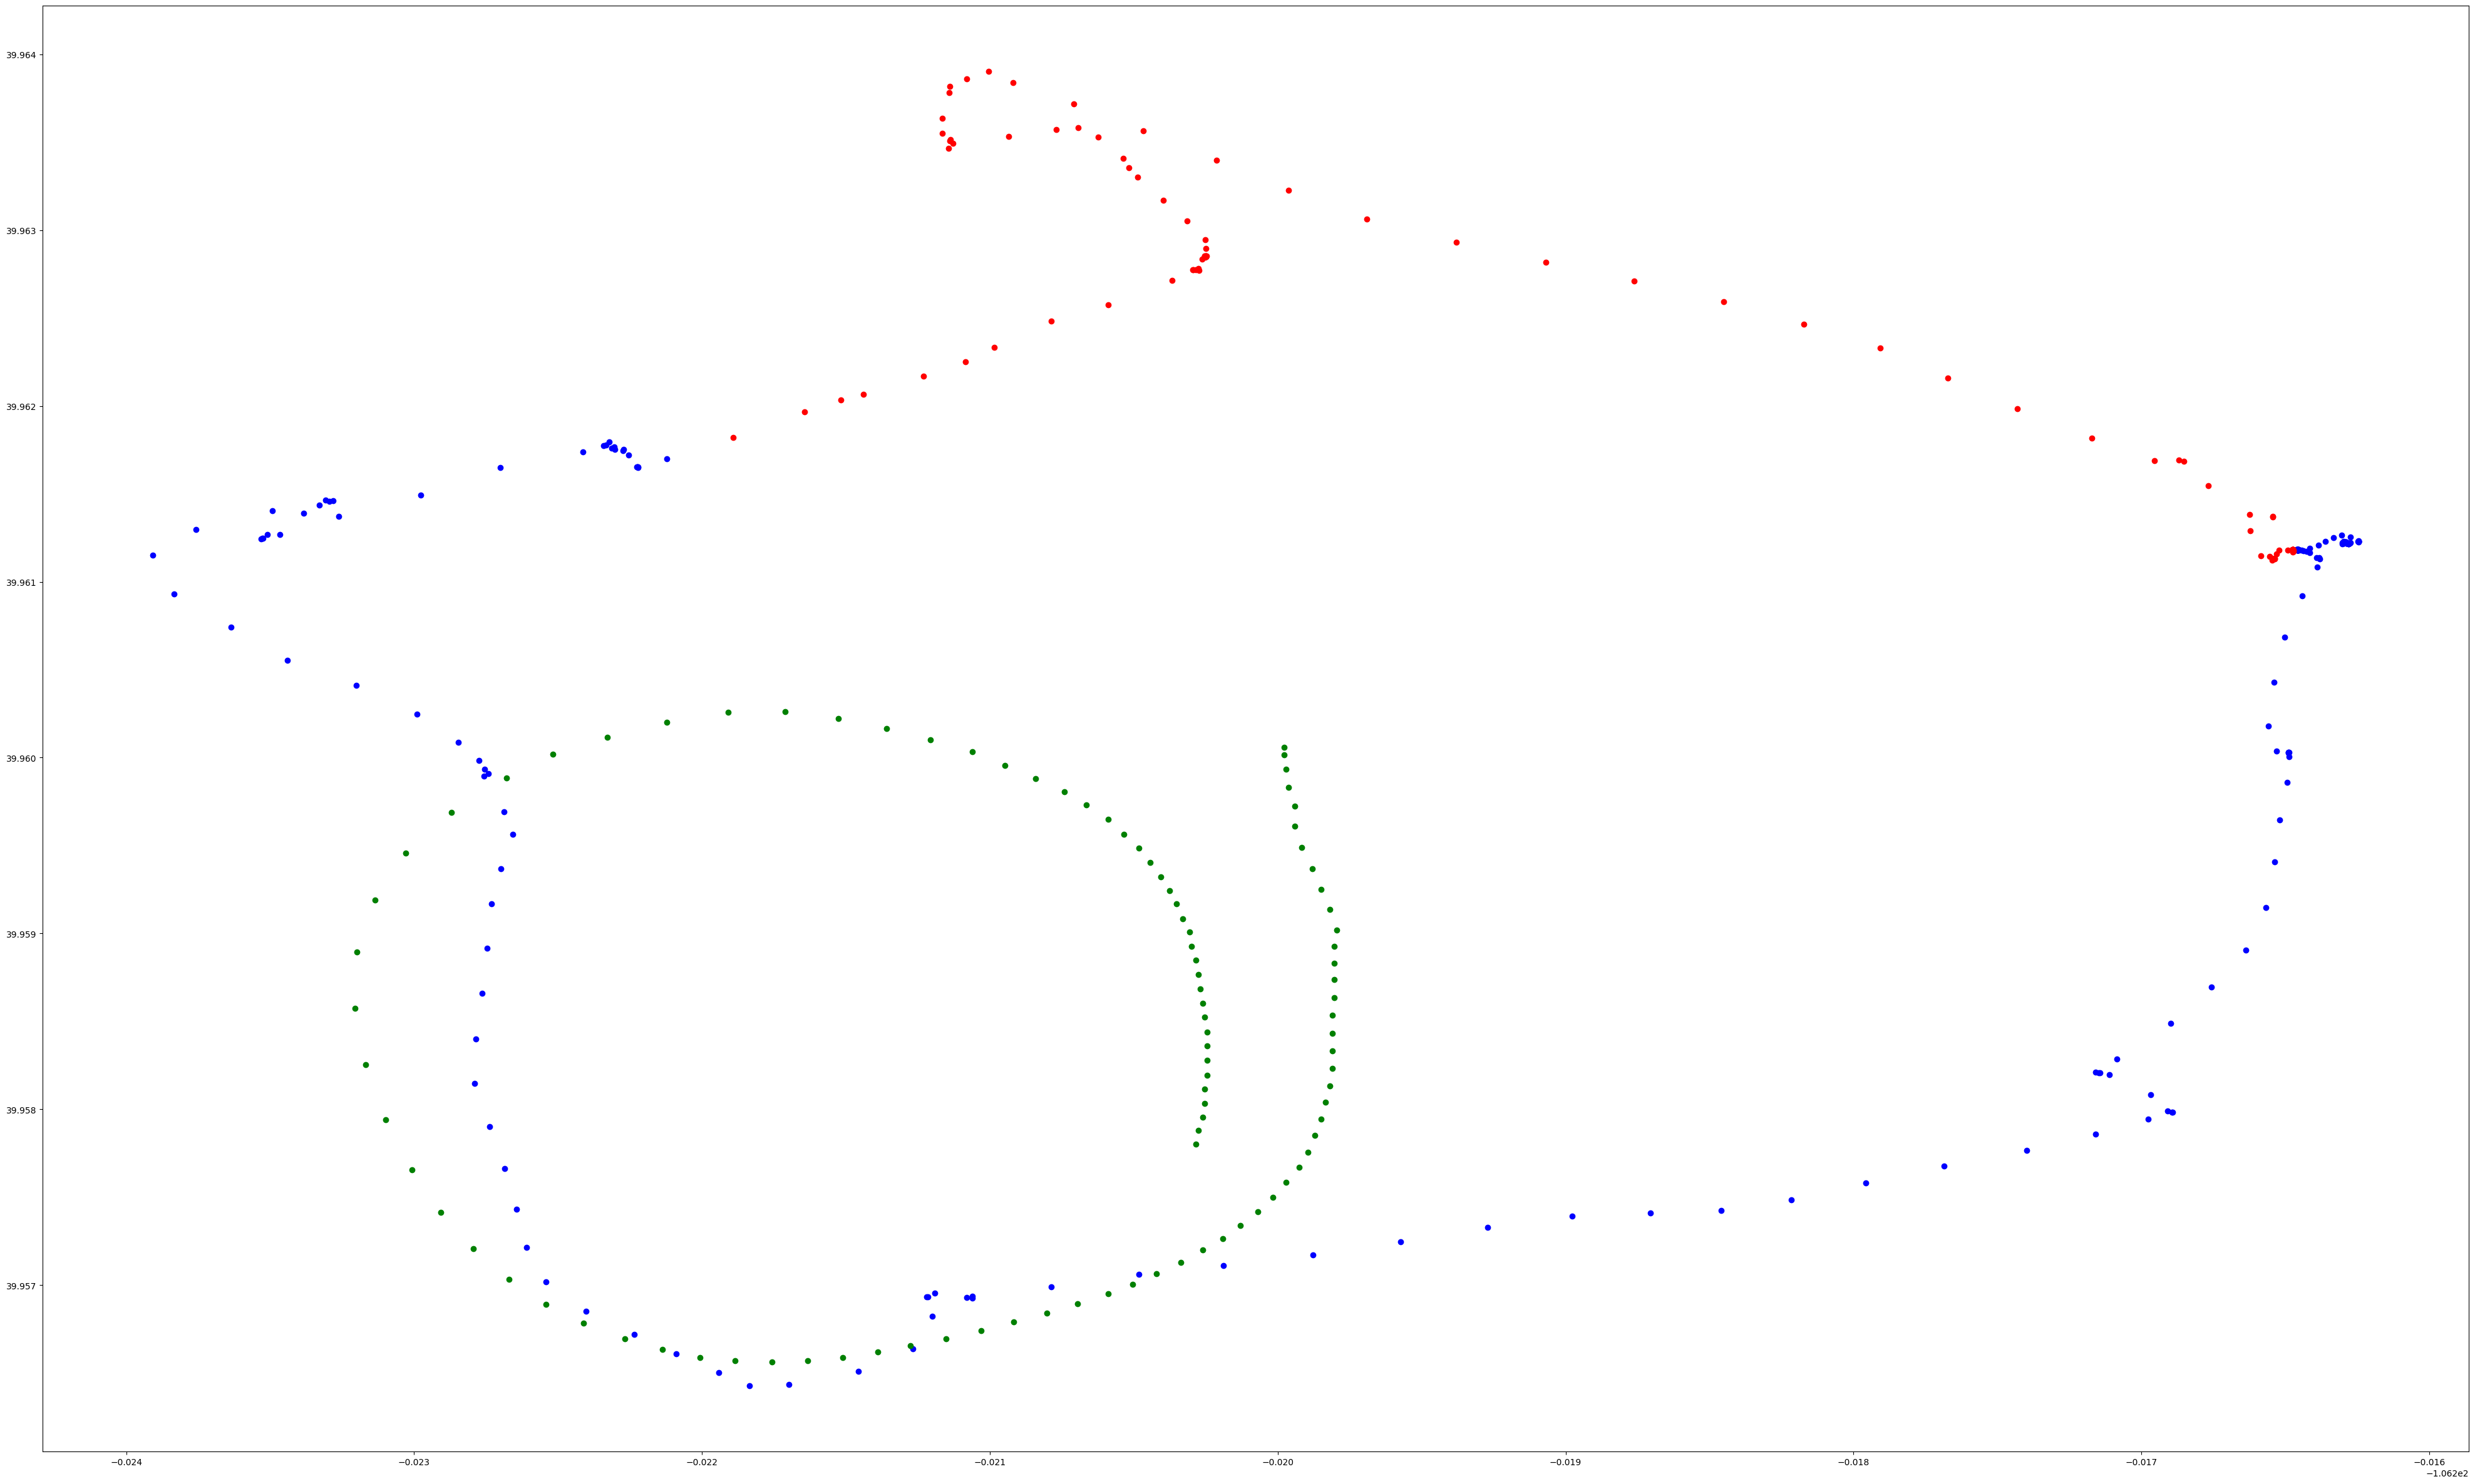

In [ ]:
plt.figure(figsize=(50, 30))
plt.scatter(df['IMU_ATTI(0):Longitude'], df['IMU_ATTI(0):Latitude'], label='Actual', color='blue')
plt.scatter(real_last_100['IMU_ATTI(0):Longitude'], real_last_100['IMU_ATTI(0):Latitude'], label='Real Last 100', color='red')
plt.scatter(predicted_df['IMU_ATTI(0):Longitude'], predicted_df['IMU_ATTI(0):Latitude'], label='Predicted', color='green')

SyntaxError: incomplete input (39752534.py, line 24)

In [3]:
import pandas as pd
import folium
from IPython.display import display

# Read the dataset and extract GPS coordinates
def read_dataset(file_path):
    # Assuming the dataset is in CSV format
    df = pd.read_csv(file_path)
    # Assuming the columns are named 'Latitude' and 'Longitude'
    gps_coordinates = df[['IMU_ATTI(0):Longitude', 'IMU_ATTI(0):Latitude']].dropna().values.tolist()
    return gps_coordinates

# Create Folium map
def create_map():
    return folium.Map(location=[0, 0], zoom_start=100)  # You can adjust the initial location and zoom level as needed

# Add markers for GPS coordinates on the Folium map
def add_markers(map_obj, gps_coordinates):
    for coord in gps_coordinates:
        lat, lon = coord
        folium.Marker(location=[float(lat), float(lon)]).add_to(map_obj)

# Main function
def main():
    dataset_file_path = 'FlightLogs/FLY006.csv'  # Update with your dataset file path
    gps_coordinates = read_dataset(dataset_file_path)
    if gps_coordinates:
        drone_map = create_map()
        add_markers(drone_map, gps_coordinates)
        display(drone_map)  # Display the map directly in Jupyter Notebook or similar environments
        print("Map generated successfully.")
    else:
        print("No GPS coordinates found in the dataset.")

if __name__ == "__main__":
    main()


/tmp/ipykernel_5757/3684895996.py:8: DtypeWarning: Columns (49,50,169,170,171,172,173,174,175,176,177,178,244,246,248,249,250,293) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


Map generated successfully.
